In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib.pyplot import figure
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ETH_monthly = pd.read_csv('/content/drive/Shareddrives/Crypto SP500 /data for arima/ETH-USD-monthly.csv')

ETH_monthly['Date'] = pd.to_datetime(ETH_monthly['Date'], infer_datetime_format=True)
ETH_monthly

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-01,1.353480,1.392740,0.557062,0.738644,0.738644,19920655
1,2015-10-01,0.734307,1.345050,0.420897,0.916627,0.916627,19815600
2,2015-11-01,0.920847,1.106420,0.725665,0.873119,0.873119,25989045
3,2015-12-01,0.878316,1.045370,0.770488,0.933542,0.933542,14436832
4,2016-01-01,0.933712,2.836990,0.929835,2.306040,2.306040,99427369
...,...,...,...,...,...,...,...
72,2021-09-01,3430.762451,4022.469238,2676.407471,3001.678955,3001.678955,653984909752
73,2021-10-01,3001.129395,4455.735352,2978.654297,4288.074219,4288.074219,574798465423
74,2021-11-01,4288.217285,4891.704590,3933.506592,4631.479004,4631.479004,573546775953
75,2021-12-01,4623.679688,4780.732422,4100.145508,4220.706055,4220.706055,75017089250


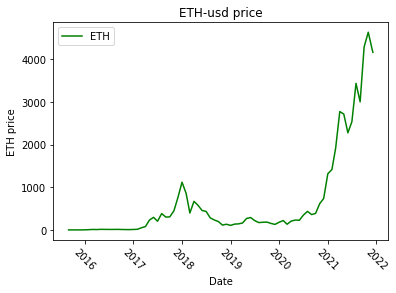

In [ ]:
line = plt.plot(ETH_monthly['Date'],ETH_monthly['Close'], 'green',label = 'ETH')
plt.title('ETH-usd price')
plt.legend()
plt.xticks(rotation = -45)
plt.xlabel("Date")
plt.ylabel("ETH price")
plt.show()

https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima

reference 


In [ ]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
ETH_monthly.drop(columns=(['Open','High','Low','Adj Close','Volume']),axis=1,inplace=True)
indexedETH_monthly=ETH_monthly.set_index(['Date'])
indexedETH_monthly

,Close
Date,
2015-09-01,0.738644
2015-10-01,0.916627
2015-11-01,0.873119
2015-12-01,0.933542
2016-01-01,2.306040
...,...
2021-09-01,3001.678955
2021-10-01,4288.074219
2021-11-01,4631.479004


In [ ]:
#From the plot below, we can see that there is a Trend compoenent in th series. 
#Hence, we now check for stationarity of the data
#Determine rolling statistics
rolmean = indexedETH_monthly.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedETH_monthly.rolling(window=12).std()
print(rolmean,rolstd)

                  Close
Date                   
2015-09-01          NaN
2015-10-01          NaN
2015-11-01          NaN
2015-12-01          NaN
2016-01-01          NaN
...                 ...
2021-09-01  1926.912918
2021-10-01  2252.036575
2021-11-01  2586.756282
2021-12-01  2876.998169
2021-12-06  3114.185964

[77 rows x 1 columns]                   Close
Date                   
2015-09-01          NaN
2015-10-01          NaN
2015-11-01          NaN
2015-12-01          NaN
2016-01-01          NaN
...                 ...
2021-09-01  1017.954390
2021-10-01  1100.932120
2021-11-01  1166.559097
2021-12-01  1095.849288
2021-12-06  1033.266697

[77 rows x 1 columns]


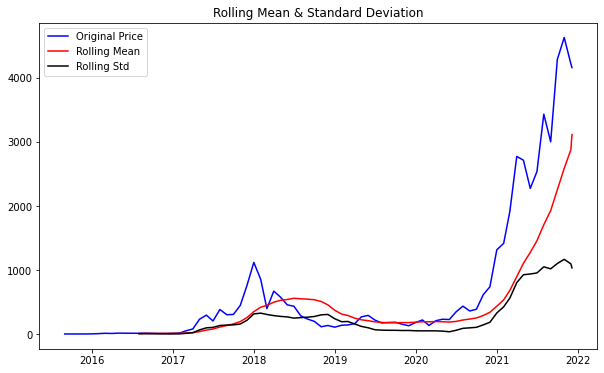

In [ ]:
#Plot rolling statistics
orig = plt.plot(indexedETH_monthly, color='blue', label='Original Price')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best') #upper left location
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedETH_monthly['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  0.110361
p-value                         0.966761
#Lags Used                      7.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [ ]:
#p-value is 0.966761, which is extremely high, 
#we cannot reject the null hypothesis that our time series is not stationarity.


#Log Scale Transformation

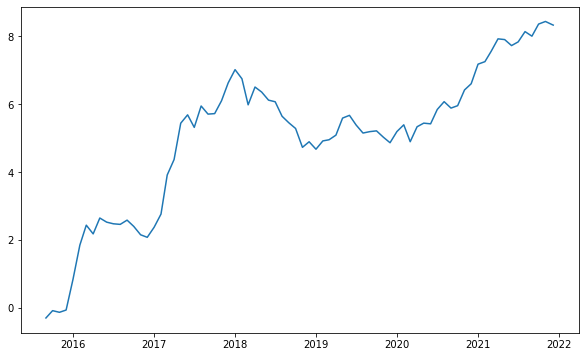

In [ ]:
#Estimating trend
indexedETH_monthly_logScale = np.log(indexedETH_monthly)
plt.plot(indexedETH_monthly_logScale)

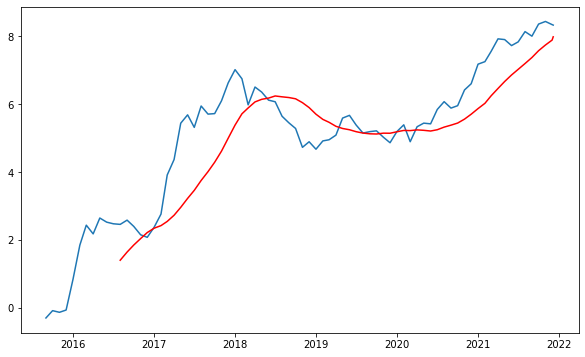

In [ ]:
#The below transformation is required to make series stationary
movingAverage = indexedETH_monthly_logScale.rolling(window=12).mean()
movingSTD = indexedETH_monthly_logScale.rolling(window=12).std()
plt.plot(indexedETH_monthly_logScale)
plt.plot(movingAverage, color='red')


In [ ]:
datasetLogScaleMinusMovingAverage = indexedETH_monthly_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)


,Close
Date,
2016-08-01,1.057503
2016-09-01,0.941950
2016-10-01,0.550522
2016-11-01,0.112603
2016-12-01,-0.140833
2017-01-01,0.028300
2017-02-01,0.340363
2017-03-01,1.368796
2017-04-01,1.642962


In [ ]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    



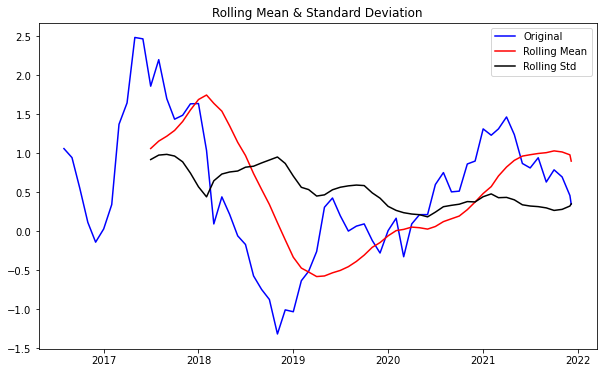

Results of Dickey Fuller Test:
Test Statistic                 -1.694742
p-value                         0.433823
#Lags Used                      0.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

In [ ]:
#p-value = 0.43 is improved but we are still not happy with it.

#Exponential Decay Transformation 

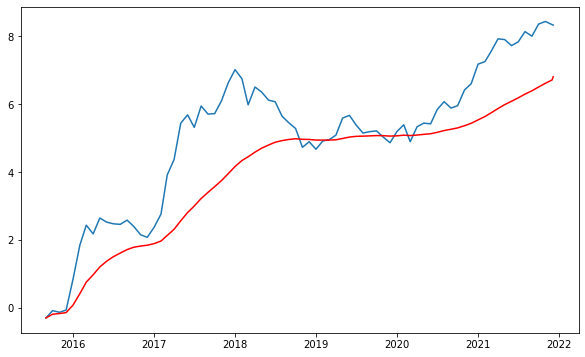

In [ ]:
exponentialDecayWeightedAverage = indexedETH_monthly_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedETH_monthly_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')


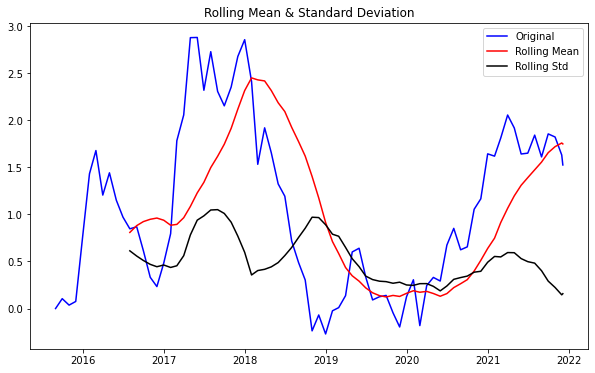

Results of Dickey Fuller Test:
Test Statistic                 -2.597542
p-value                         0.093506
#Lags Used                      3.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


In [ ]:
datasetLogScaleMinusExponentialMovingAverage = indexedETH_monthly_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

#p-value is not very good and the series for moving avg & std. dev. is not parallel to x-axis

#Time Shift Transformation 

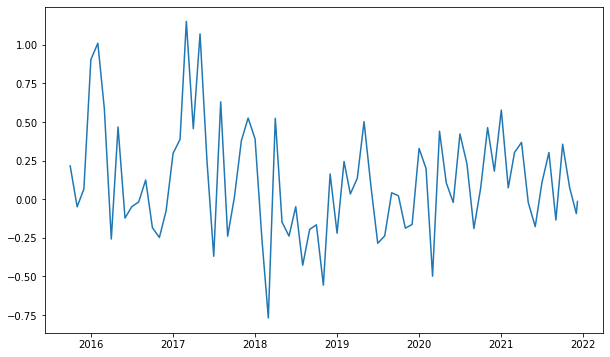

In [ ]:
datasetLogDiffShifting = indexedETH_monthly_logScale - indexedETH_monthly_logScale.shift()
plt.plot(datasetLogDiffShifting)


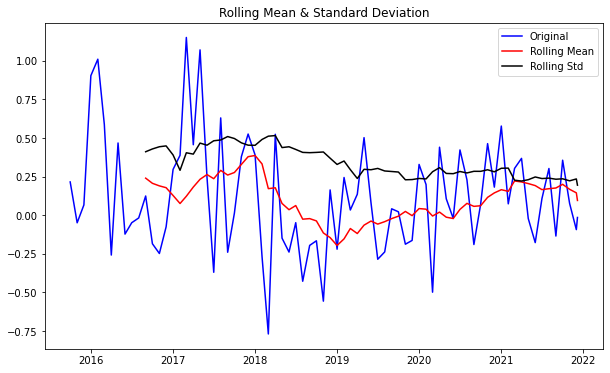

Results of Dickey Fuller Test:
Test Statistic                -6.926426e+00
p-value                        1.112298e-09
#Lags Used                     0.000000e+00
Number of Observations Used    7.500000e+01
Critical Value (1%)           -3.520713e+00
Critical Value (5%)           -2.900925e+00
Critical Value (10%)          -2.587781e+00
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

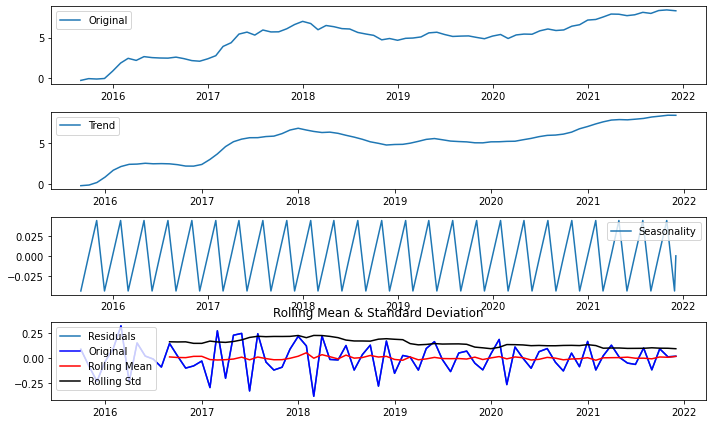

Results of Dickey Fuller Test:
Test Statistic                 -5.607116
p-value                         0.000001
#Lags Used                      6.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


In [ ]:
decomposition = seasonal_decompose(indexedETH_monthly_logScale, freq=3) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedETH_monthly_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

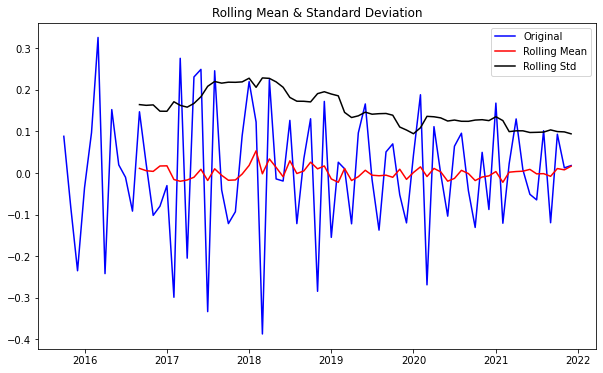

Results of Dickey Fuller Test:
Test Statistic                 -5.607116
p-value                         0.000001
#Lags Used                      6.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)



#Plotting ACF & PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



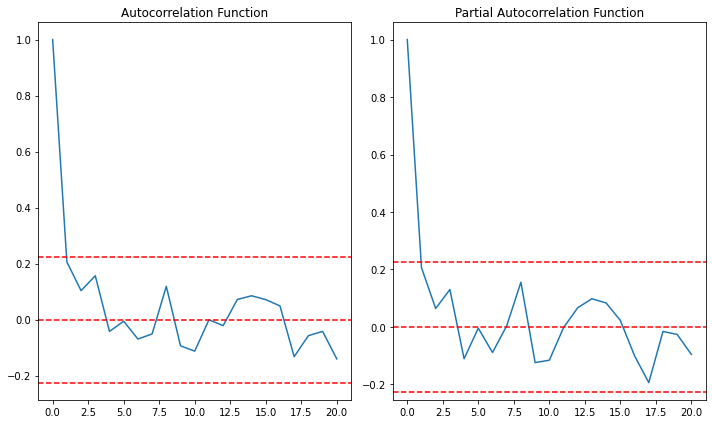

In [ ]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            



From the ACF graph, we see that curve touches y=0 and it crosses the first line at x=2 or 1. Thus, from theory, Q = 2 or 1 From the PACF graph, we see that curve touches y=0.0 line and crosses the first line at x=2 or 1. Thus, from theory, P = 2 or 1

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models wi:ll give a value of RSS. Lower RSS values indicate a better model.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Plotting AR model


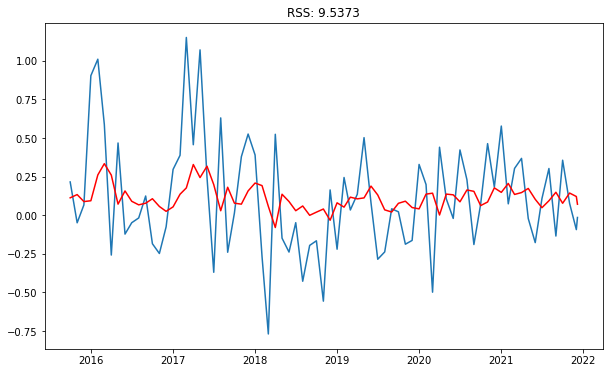

In [ ]:
#AR Model
#making order=() gives RSS=
model = ARIMA(indexedETH_monthly_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Plotting MA model


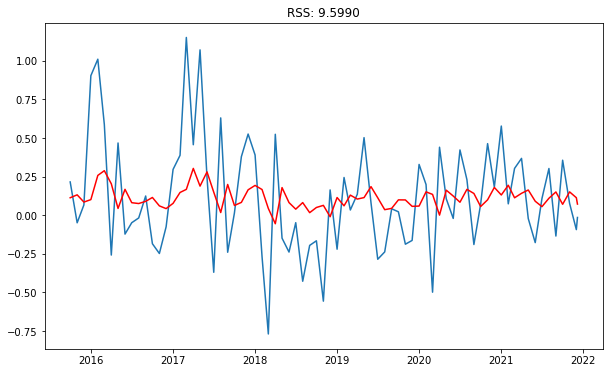

In [ ]:
#MA Model
model = ARIMA(indexedETH_monthly_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting MA model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Plotting ARIMA model


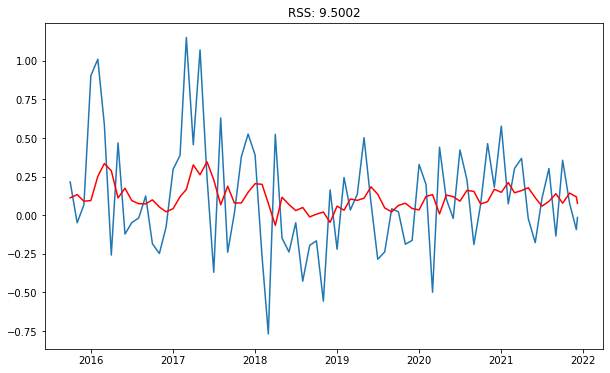

In [ ]:
# AR+I+MA = ARIMA model
model = ARIMA(indexedETH_monthly_logScale, order=(2,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting ARIMA model')

In [ ]:
#RSS of ARIMA = 9.5002 < RSS of AR and MA, therefore, ARIMA is a better model for our time series.

#Prediction & Reverse transformations

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2015-10-01    0.113012
2015-11-01    0.133955
2015-12-01    0.091149
2016-01-01    0.095294
2016-02-01    0.252033
dtype: float64


In [ ]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)



Date
2015-10-01    0.113012
2015-11-01    0.246967
2015-12-01    0.338116
2016-01-01    0.433410
2016-02-01    0.685443
                ...   
2021-09-01    8.248636
2021-10-01    8.327248
2021-11-01    8.470705
2021-12-01    8.590067
2021-12-06    8.667179
Length: 76, dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(indexedETH_monthly_logScale['Close'].iloc[0], index=indexedETH_monthly_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()



Date
2015-09-01   -0.302939
2015-10-01   -0.189927
2015-11-01   -0.055972
2015-12-01    0.035177
2016-01-01    0.130471
dtype: float64

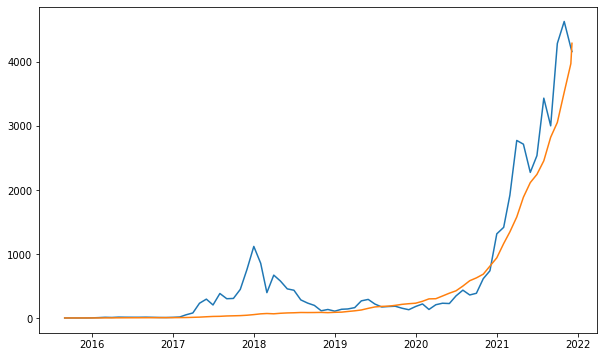

In [ ]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedETH_monthly)
plt.plot(predictions_ARIMA)


In [ ]:
#The prediciton line fits quite good.

In [ ]:
indexedETH_monthly_logScale

,Close
Date,
2015-09-01,-0.302939
2015-10-01,-0.087055
2015-11-01,-0.135683
2015-12-01,-0.068769
2016-01-01,0.835532
...,...
2021-09-01,8.006927
2021-10-01,8.363593
2021-11-01,8.440632


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



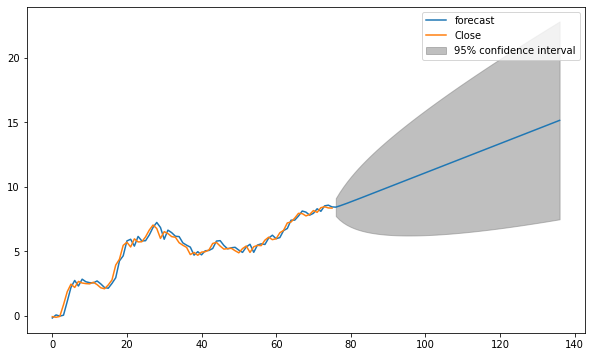

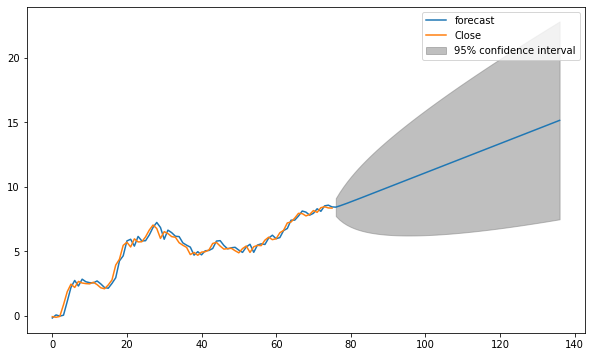

In [ ]:
#We have 77(existing data of 6 yrs in months) data points. 
#And we want to forecast for additional 60 data points for 5 yrs.
results_ARIMA.plot_predict(1,137) 


